## 1. Сгенерировать случайный набор двухмерных событий на неподвижной мишени с углом разлета треков 15°, расстоянием 1 между слоями детектора и точностью определения координаты хита 0.01. В детекторе 6 слоев, в событии 5 треков, в датасете 100 событий.



In [1]:
!pip install 'git+https://github.com/LAL/trackml-library@master#egg=trackml'

ERROR: Invalid requirement: "'git+https://github.com/LAL/trackml-library@master#egg=trackml'"
Hint: = is not a valid operator. Did you mean == ?


In [2]:
import numpy as np
from scipy.stats import uniform, norm

SCATTER_ANGLE = 15 * np.pi / 180  # угол разлета треков
HIT_Y_ERROR = 0.01                # точность определения координаты хита
N_LAYERS = 6                      # число слоев в детекторе

angle_dist = uniform(-SCATTER_ANGLE, 2*SCATTER_ANGLE)
detector_z = 1.0 + np.arange(N_LAYERS)
dy_dist = norm(scale=HIT_Y_ERROR)

In [3]:
import pandas as pd
rng = np.random.default_rng()

In [4]:
def gen_track(angle):
  df = pd.DataFrame({
    'z': detector_z
  })
  df['y'] = np.tan(angle) * df.z + dy_dist.rvs(N_LAYERS, rng)
  df.index.rename('layer', inplace=True)
  return df

gen_track(np.pi / 4)

,z,y
layer,,
0,1.0,0.999386
1,2.0,2.006279
2,3.0,2.984735
3,4.0,4.000498
4,5.0,5.022485
5,6.0,6.012708


In [5]:
def gen_event(n_tracks):
  df = pd.DataFrame({'track_angle': angle_dist.rvs(n_tracks, rng)})
  df['particle_id'] = df.index
  df = df.groupby('particle_id').apply(lambda row: gen_track(row.track_angle.iloc[0]))
  df['weight'] = 1
  df.reset_index(inplace=True)
  df['hit_id'] = df.index
  return df

gen_event(1)

,particle_id,layer,z,y,weight,hit_id
0,0,0,1.0,0.188714,1,0
1,0,1,2.0,0.388707,1,1
2,0,2,3.0,0.576645,1,2
3,0,3,4.0,0.783130,1,3
4,0,4,5.0,0.971274,1,4
5,0,5,6.0,1.191360,1,5


In [6]:
def gen_dataset(n_events, n_tracks):
  result = []
  for event_id in range(n_events):
    event = gen_event(n_tracks)
    event['event_id'] = event_id
    result.append(event)
  return pd.concat(result).reset_index(drop=True)

df = gen_dataset(100, 5)  # 100 событий по 5 треков

In [7]:
df

,particle_id,layer,z,y,weight,hit_id,event_id
0,0,0,1.0,0.266325,1,0,0
1,0,1,2.0,0.522477,1,1,0
2,0,2,3.0,0.793115,1,2,0
3,0,3,4.0,1.037835,1,3,0
4,0,4,5.0,1.294225,1,4,0
...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.171568,1,25,99
2996,4,2,3.0,-0.243959,1,26,99
2997,4,3,4.0,-0.342769,1,27,99
2998,4,4,5.0,-0.430878,1,28,99


## 2. Перейти в полярные координаты r, ϕ.

<Axes: xlabel='z', ylabel='y'>

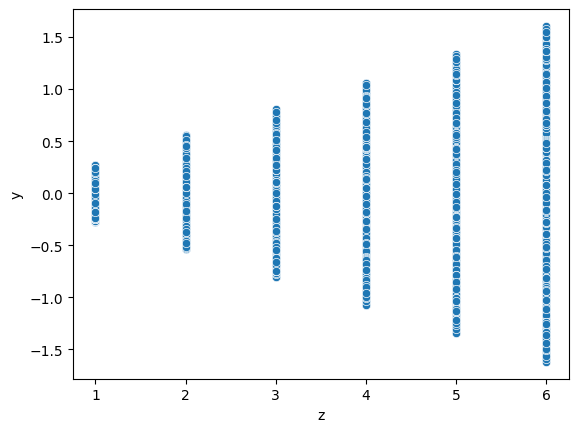

In [10]:
import seaborn as sns
sns.scatterplot(data=df, x='z', y='y')

<Axes: xlabel='z', ylabel='phi'>

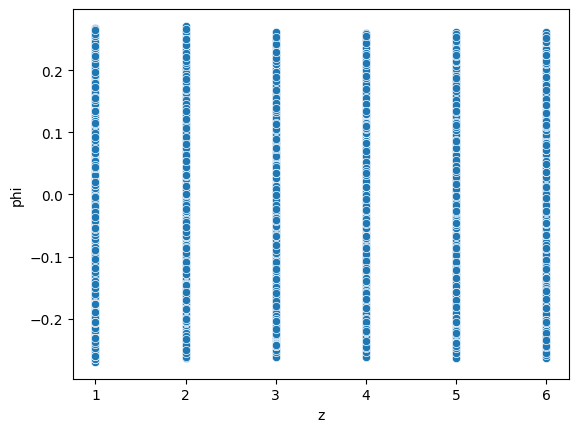

In [11]:
df['r'] = np.sqrt(df.z**2 + df.y**2)
df['phi'] = np.arctan2(df.y, df.z)
sns.scatterplot(data=df, x='z', y='phi')

In [12]:
df

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi
0,0,0,1.0,0.266325,1,0,0,1.034857,0.260284
1,0,1,2.0,0.522477,1,1,0,2.067119,0.255528
2,0,2,3.0,0.793115,1,2,0,3.103068,0.258459
3,0,3,4.0,1.037835,1,3,0,4.132445,0.253861
4,0,4,5.0,1.294225,1,4,0,5.164786,0.253286
...,...,...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.171568,1,25,99,2.007345,-0.085574
2996,4,2,3.0,-0.243959,1,26,99,3.009903,-0.081141
2997,4,3,4.0,-0.342769,1,27,99,4.014659,-0.085483
2998,4,4,5.0,-0.430878,1,28,99,5.018531,-0.085963


In [13]:
df.head(10)

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi
0,0,0,1.0,0.266325,1,0,0,1.034857,0.260284
1,0,1,2.0,0.522477,1,1,0,2.067119,0.255528
2,0,2,3.0,0.793115,1,2,0,3.103068,0.258459
3,0,3,4.0,1.037835,1,3,0,4.132445,0.253861
4,0,4,5.0,1.294225,1,4,0,5.164786,0.253286
5,0,5,6.0,1.551087,1,5,0,6.197247,0.252976
6,1,0,1.0,0.181898,1,6,0,1.016409,0.179931
7,1,1,2.0,0.368500,1,7,0,2.033665,0.182206
8,1,2,3.0,0.562791,1,8,0,3.052332,0.185442
9,1,3,4.0,0.739239,1,9,0,4.067736,0.182748


## 3. Провести кластеризацию методом AffinityPropagation (по углу ϕ) для каждого события

<Axes: >

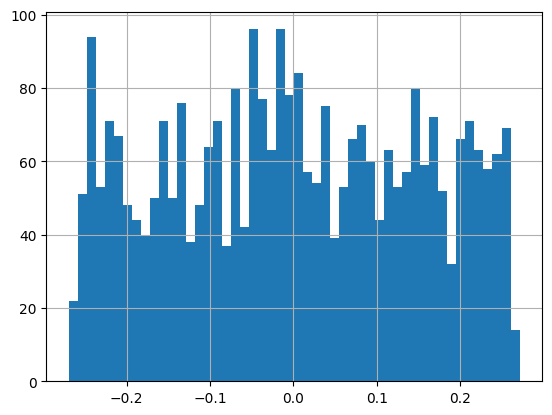

In [14]:
df.phi.hist(bins=50)

In [15]:
from sklearn.cluster import AffinityPropagation

track_id = np.array([])  # ndarray кластеров для всего датасета

af = AffinityPropagation(damping=0.5, max_iter=200)

for i in range(0,100):  #  i - id события
    selected_event = df.loc[df['event_id'] == i]

    x_train = selected_event['phi'].to_numpy()

    af.fit_predict(x_train.reshape(-1, 1))

    #af = AffinityPropagation().fit(selected_event[['r', 'phi']])
    track_id = np.concatenate((track_id, af.labels_))

C:\Users\sorni\miniconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\sorni\miniconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\sorni\miniconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\sorni\miniconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\sorni\miniconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: Co

In [16]:
track_id

array([2., 2., 2., ..., 3., 3., 3.])

In [17]:
len(track_id)

3000

In [18]:
df = df.assign(track_id=track_id)
df

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi,track_id
0,0,0,1.0,0.266325,1,0,0,1.034857,0.260284,2.0
1,0,1,2.0,0.522477,1,1,0,2.067119,0.255528,2.0
2,0,2,3.0,0.793115,1,2,0,3.103068,0.258459,2.0
3,0,3,4.0,1.037835,1,3,0,4.132445,0.253861,2.0
4,0,4,5.0,1.294225,1,4,0,5.164786,0.253286,2.0
...,...,...,...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.171568,1,25,99,2.007345,-0.085574,3.0
2996,4,2,3.0,-0.243959,1,26,99,3.009903,-0.081141,3.0
2997,4,3,4.0,-0.342769,1,27,99,4.014659,-0.085483,3.0
2998,4,4,5.0,-0.430878,1,28,99,5.018531,-0.085963,3.0


In [19]:
df['track_id'].unique()

array([2., 0., 1., 3., 4.])

## 4. Визуализировать результат для одного события

In [20]:
import random

selected_event = df.loc[df['event_id'] == random.randint(0, 99)]
selected_event

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi,track_id
0,0,0,1.0,0.266325,1,0,0,1.034857,0.260284,2.0
1,0,1,2.0,0.522477,1,1,0,2.067119,0.255528,2.0
2,0,2,3.0,0.793115,1,2,0,3.103068,0.258459,2.0
3,0,3,4.0,1.037835,1,3,0,4.132445,0.253861,2.0
4,0,4,5.0,1.294225,1,4,0,5.164786,0.253286,2.0
5,0,5,6.0,1.551087,1,5,0,6.197247,0.252976,2.0
6,1,0,1.0,0.181898,1,6,0,1.016409,0.179931,0.0
7,1,1,2.0,0.368500,1,7,0,2.033665,0.182206,0.0
8,1,2,3.0,0.562791,1,8,0,3.052332,0.185442,0.0
9,1,3,4.0,0.739239,1,9,0,4.067736,0.182748,0.0


Text(0.5, 0.98, 'Кластеризация AffinityPropagation для одного события')

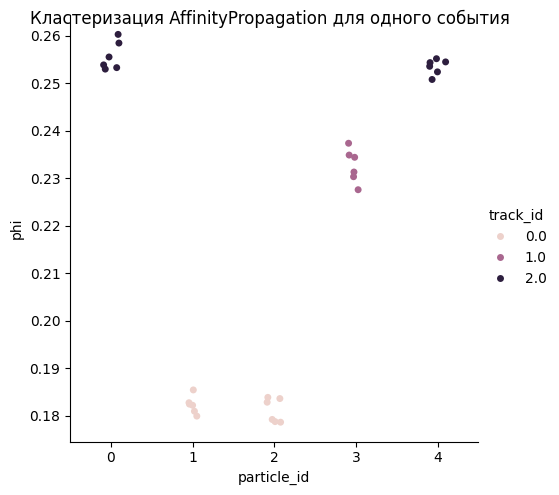

In [21]:
g = sns.catplot(data=selected_event, x='particle_id', y='phi', hue='track_id')
g.fig.suptitle('Кластеризация AffinityPropagation для одного события')

## 5. Получить с помощью trackml_score оценку качества результата трекинга для каждого события

In [22]:
from trackml.score import score_event

trackml_score = []

for i in range(0,100):  #  i - id события

    selected_event = df.loc[df['event_id'] == i]

    trackml_score.append(score_event(selected_event, selected_event))

In [23]:
len(trackml_score)

100

## 6. Построить гистограмму распределения trackml_score событий датасета

Text(0.5, 1.0, 'Гистограмма распределения trackml_score событий датасета')

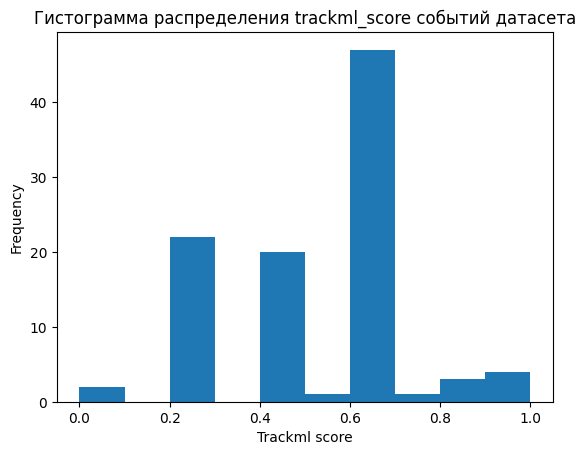

In [24]:
from matplotlib import pyplot as plt

plt.hist(trackml_score, range=(0,1))

plt.xlabel('Trackml score')
plt.ylabel('Frequency')
plt.title('Гистограмма распределения trackml_score событий датасета')